In [11]:
from HLsearch import *
from scipy.integrate import solve_ivp
import numpy as np
from sympy import symbols, var, diff, simplify, collect,solve
from sympy.utilities.lambdify import lambdify, implemented_function

from operator import add,sub,mul

import itertools
import scipy.io as sio

import time

%matplotlib notebook
import matplotlib.pyplot as plt

def generate_data(func, time, init_values):
    sol = solve_ivp(func,[time[0],time[-1]],init_values,t_eval=time, method='RK45',rtol=1e-10,atol=1e-10)
    return sol.y.T, np.array([func(0,sol.y.T[i,:]) for i in range(sol.y.T.shape[0])],dtype=np.float64)

def pendulum(t,x):
    return x[1],-9.81*np.sin(x[0])-0.5*x[1]

t = np.arange(0,10,0.01)
y0=np.array([np.pi/4, 0])
X,Xdot = generate_data(pendulum,t,y0)

<IPython.core.display.Javascript object>


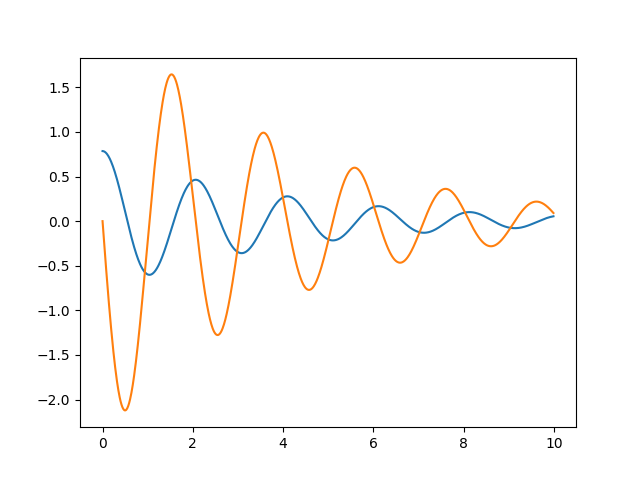

In [12]:
plt.plot(t,X[:,0])
plt.plot(t,X[:,1])

In [14]:
data_description = ()
for i in range(round(X.shape[1]/2)):
    data_description = data_description + symbols('x{}, x{}_t'.format(i,i))
print('Variables are:',data_description)
data_description_sym = data_description
data_description = list(str(descr) for descr in data_description)
expr = buildFunctionExpressions(2,X.shape[1],data_description,use_sine=True)
print(expr)
Theta = buildTimeSerieMatrixFromFunctions(X,expr, data_description)

Gamma = buildTimeDerivativeMatrixFromFunctions(X,Xdot,expr,data_description)


u, s, vh = np.linalg.svd(0*Theta-Gamma,full_matrices=False)

xi = vh.T[:,-1]

Variables are: (x0, x0_t)
['x0', 'x0_t', 'sin(x0)', 'cos(x0)', 'x0**2', 'x0*x0_t', 'x0_t**2', 'x0*sin(x0)', 'x0_t*sin(x0)', 'sin(x0)**2', 'x0*cos(x0)', 'x0_t*cos(x0)', 'sin(x0)*cos(x0)', 'cos(x0)**2']


In [15]:
print('Now drop off small coefficients')
Hamiltonian,terms = generateSimplifiedExpression(xi,expr)

print('H = ',Hamiltonian)

Now drop off small coefficients
H =  
